In [2]:
import numpy as np
import sklearn
import pandas as pd

In [3]:
import numpy as np
data_set = np.load("feature_matrix.npy")
label = np.load("label.npy")

In [4]:
from sklearn.utils import shuffle
X, Y = shuffle(data_set, label,random_state=42)
from sklearn.model_selection import train_test_split
X_train_validation, X_test, y_train_validation, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)

X_train, X_validation, y_train, y_validation =  train_test_split(
    X_train_validation,y_train_validation, test_size = 0.25, random_state=42
)

In [5]:
from sklearn import svm
svm_classifier = svm.SVC(kernel = "rbf")
svm_classifier.fit(X_train,y_train)

SVC()

In [6]:
print(svm_classifier.score(X_train,y_train))
print(svm_classifier.score(X_validation,y_validation))
print(svm_classifier.score(X_test,y_test))

1.0
0.903125
0.8875


In [7]:
print(y_train[0:100])

[1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0
 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1]


In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

Confusion matrix
[[136  20]
 [ 16 148]]
Normalized confusion matrix
[[0.87179487 0.12820513]
 [0.09756098 0.90243902]]


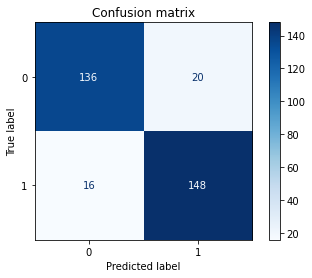

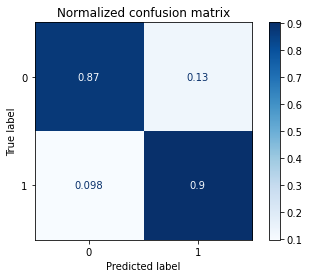

In [9]:
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svm_classifier, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [10]:
candidates_C = np.logspace(-3,3,num=7)
candidates_C

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [12]:
def F1_score_measurement(model, X_data, y_true, threshold):
    predicted_y_prob = model.predict_proba(X_data)
    predicted_y = predicted_y_prob[:,1]>threshold
    predicted_y = predicted_y*1

    tp=tn=fp=fn=0
    for i in range(0, len(predicted_y)):
        if(predicted_y[i]==0 and y_true[i] == 0):
            tn+=1
        if(predicted_y[i]==1 and y_true[i] == 1):
            tp+=1
        if(predicted_y[i]==0 and y_true[i] == 1):
            fn+=1
        if(predicted_y[i]==1 and y_true[i] == 0):
            fp+=1
    
    result = {}
    
    result["tn"]=tn
    result["fp"]=fp
    result["fn"]=fn
    result["tp"]=tp
    
    result["accuracy"]= (tn+tp)/(tn+fp+fn+tp)
    result["precision"]= tp/(tp+fp+0.00000000001)
    result["recall"] = tp/(tp+fn+0.0000000000001)
    result["F1_score"]= (2* result["precision"]*result["recall"])/(result["precision"]+result["recall"]+0.000000001)
    
    return result

In [13]:
mx_score=0
winner_c=0;
list_score=[]
for candidate in candidates_C:
    svm_classifier = svm.SVC(kernel = "rbf",C=candidate)
    svm_classifier.fit(X_train,y_train)
    vd_score =svm_classifier.score(X_validation,y_validation)
    list_score.append(vd_score)
    
    if(vd_score > mx_score):
        winner_c=candidate
        mx_score = vd_score

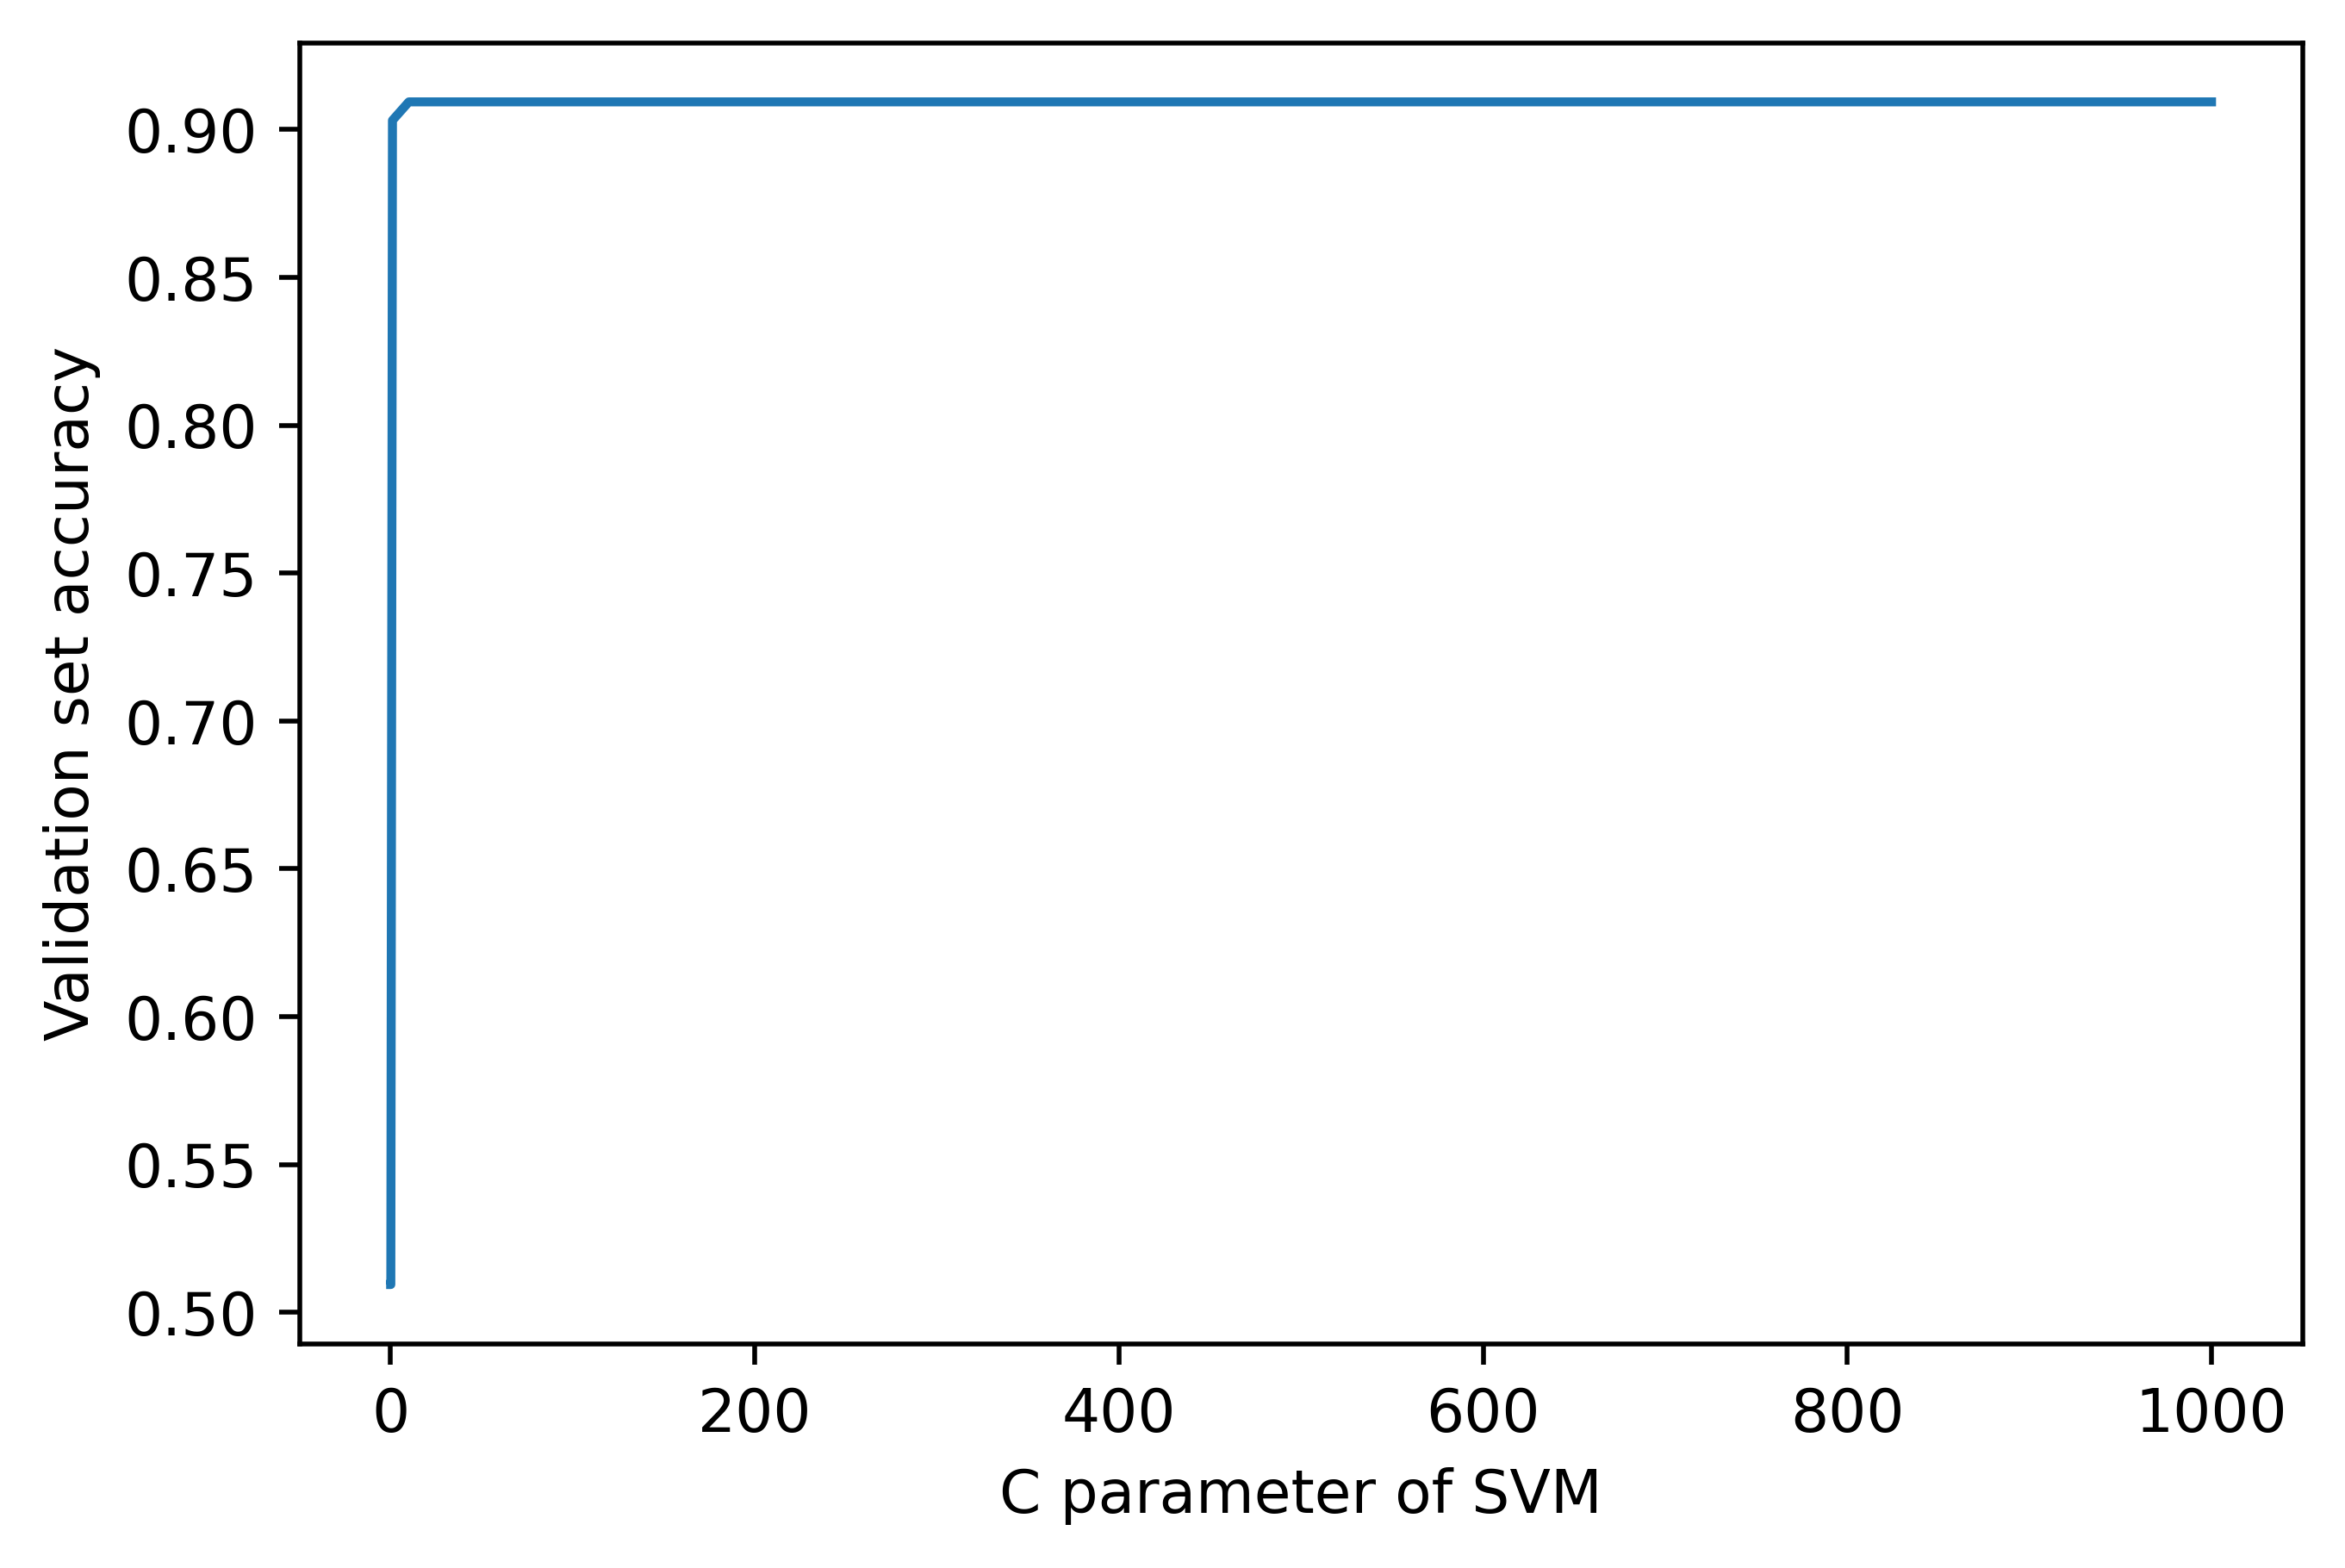

In [14]:
import matplotlib.pyplot as plt
plt.figure(dpi=500)
plt.plot(candidates_C,list_score)
plt.xlabel("C parameter of SVM")
plt.ylabel("Validation set accuracy")

plt.savefig("SVM_C_tuning.png")
plt.show()

In [15]:
print(winner_c)
Global_winner_c = winner_c
svm_classifier = svm.SVC(kernel = "rbf",C=Global_winner_c)
svm_classifier.fit(X_train,y_train)
print(svm_classifier.score(X_test,y_test))
print(svm_classifier.score(X_validation,y_validation))

10.0
0.8875
0.909375


## Tuning gamma parameter

In [16]:
candidates_gamma = np.linspace(.1,1,num=20)
candidates_gamma

array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])

In [17]:
mx_score=0
winner_gamma=0;
list_score=[]
for gamma in candidates_gamma:
    svm_classifier = svm.SVC(kernel = "rbf",C=Global_winner_c, gamma=gamma)
    svm_classifier.fit(X_train,y_train)
    vd_score =svm_classifier.score(X_validation,y_validation)
    list_score.append(vd_score)
    
    if(vd_score >= mx_score):
        winner_gamma=gamma
        mx_score = vd_score

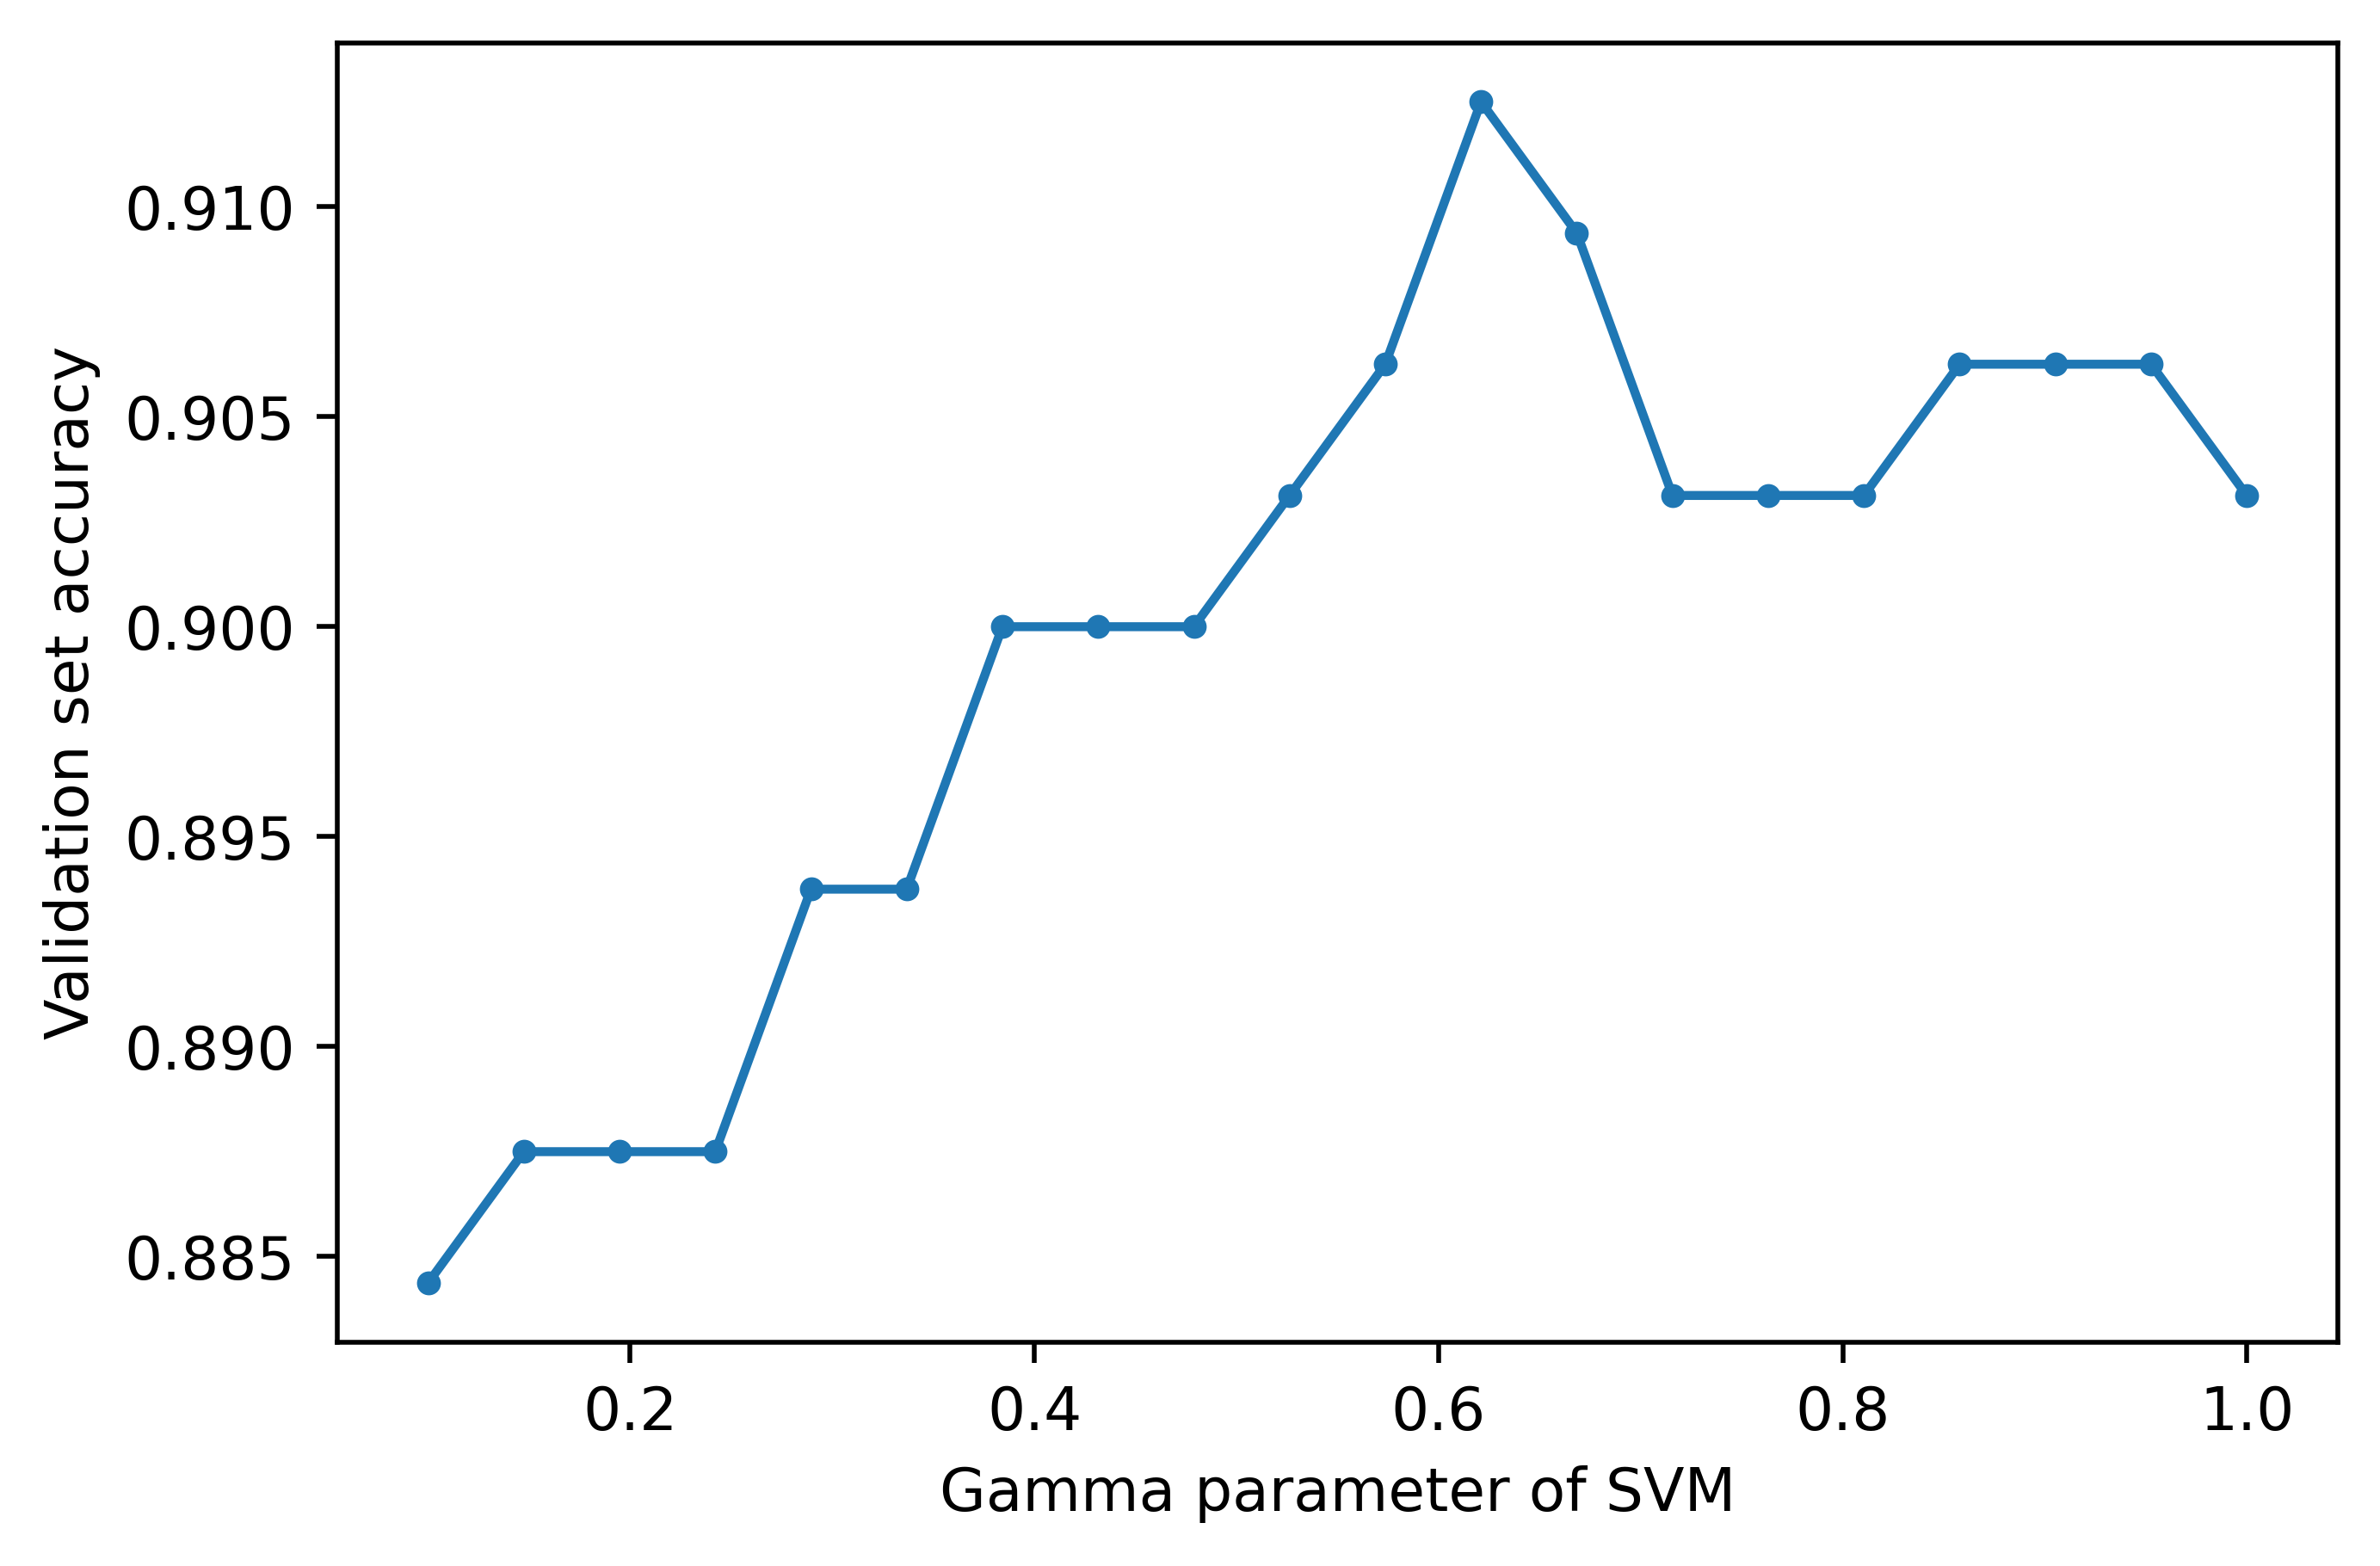

In [18]:
import matplotlib.pyplot as plt
plt.figure(dpi=500)
plt.plot(candidates_gamma,list_score, marker='.')
plt.xlabel("Gamma parameter of SVM")
plt.ylabel("Validation set accuracy")

plt.savefig("SVM_gamma_tuning.png")
plt.show()



0.6210526315789474
0.8875
0.9125
{'tn': 141, 'fp': 15, 'fn': 23, 'tp': 141, 'accuracy': 0.88125, 'precision': 0.9038461538460959, 'recall': 0.859756097560975, 'F1_score': 0.8812499995002846}
Confusion matrix
[[141  15]
 [ 21 143]]


<Figure size 3600x2400 with 0 Axes>

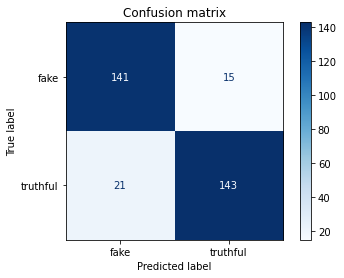

In [20]:
print(winner_gamma)
svm_classifier = svm.SVC(kernel = "rbf",C=Global_winner_c,gamma=winner_gamma,probability=True)
svm_classifier.fit(X_train,y_train)
print(svm_classifier.score(X_test,y_test))
print(svm_classifier.score(X_validation,y_validation))

titles_options = [("Confusion matrix", None)]
plt.figure(dpi=600)
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svm_classifier, X_test, y_test,
                                 display_labels=["fake","truthful"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.savefig("conmat_svm.png",dpi=600)
plt.show()

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def draw_ROC(model, x_data, y_true):

    #No skill probabilities
    ns_probs = [0 for _ in range(len(y_true))]

    # predict probabilities
    svm_probs = model.predict_proba(x_data)
    # keep probabilities for the positive outcome only
    svm_probs = svm_probs[:, 1]
    
    
    ##Add logistic regression
    from sklearn.linear_model import LogisticRegression
    clf_logReg = LogisticRegression(random_state=1,max_iter=400,C=1,penalty="l2",solver="lbfgs")
    clf_logReg.fit(X_train,y_train)
    lr_probs = clf_logReg.predict_proba(x_data)
    lr_probs = lr_probs[:, 1]
    
     ##Add Naive Bayes classifier
    from sklearn.naive_bayes import MultinomialNB
    clf_NB = MultinomialNB()
    clf_NB.fit(X_train,y_train)
    nb_probs = clf_NB.predict_proba(x_data)
    nb_probs = nb_probs[:, 1]


    # calculate scores
    ns_auc = roc_auc_score(y_true, ns_probs)
    svm_auc = roc_auc_score(y_true, svm_probs)
    lr_auc = roc_auc_score(y_true, lr_probs)
    nb_auc = roc_auc_score(y_true, nb_probs)

    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('SVM Classifier: ROC AUC=%.3f' % (svm_auc))
    print('Logistic regression Classifier: ROC AUC=%.3f' % (lr_auc))
    print('Naive Bayes Classifier: ROC AUC=%.3f' % (nb_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_true, ns_probs)
    svm_fpr, svm_tpr, _ = roc_curve(y_true, svm_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_true, lr_probs)
    nb_fpr, nb_tpr, _ = roc_curve(y_true, nb_probs)
    
  
    

    # plot the roc curve for the model
    plt.figure(dpi=600)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
    plt.plot(nb_fpr, nb_tpr,marker='.', label='Naive Bayes')
    # axis labels
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    plt.savefig("final_ROC.png")
    # show the plot
    plt.show()

No Skill: ROC AUC=0.500
SVM Classifier: ROC AUC=0.951
Logistic regression Classifier: ROC AUC=0.936
Naive Bayes Classifier: ROC AUC=0.944


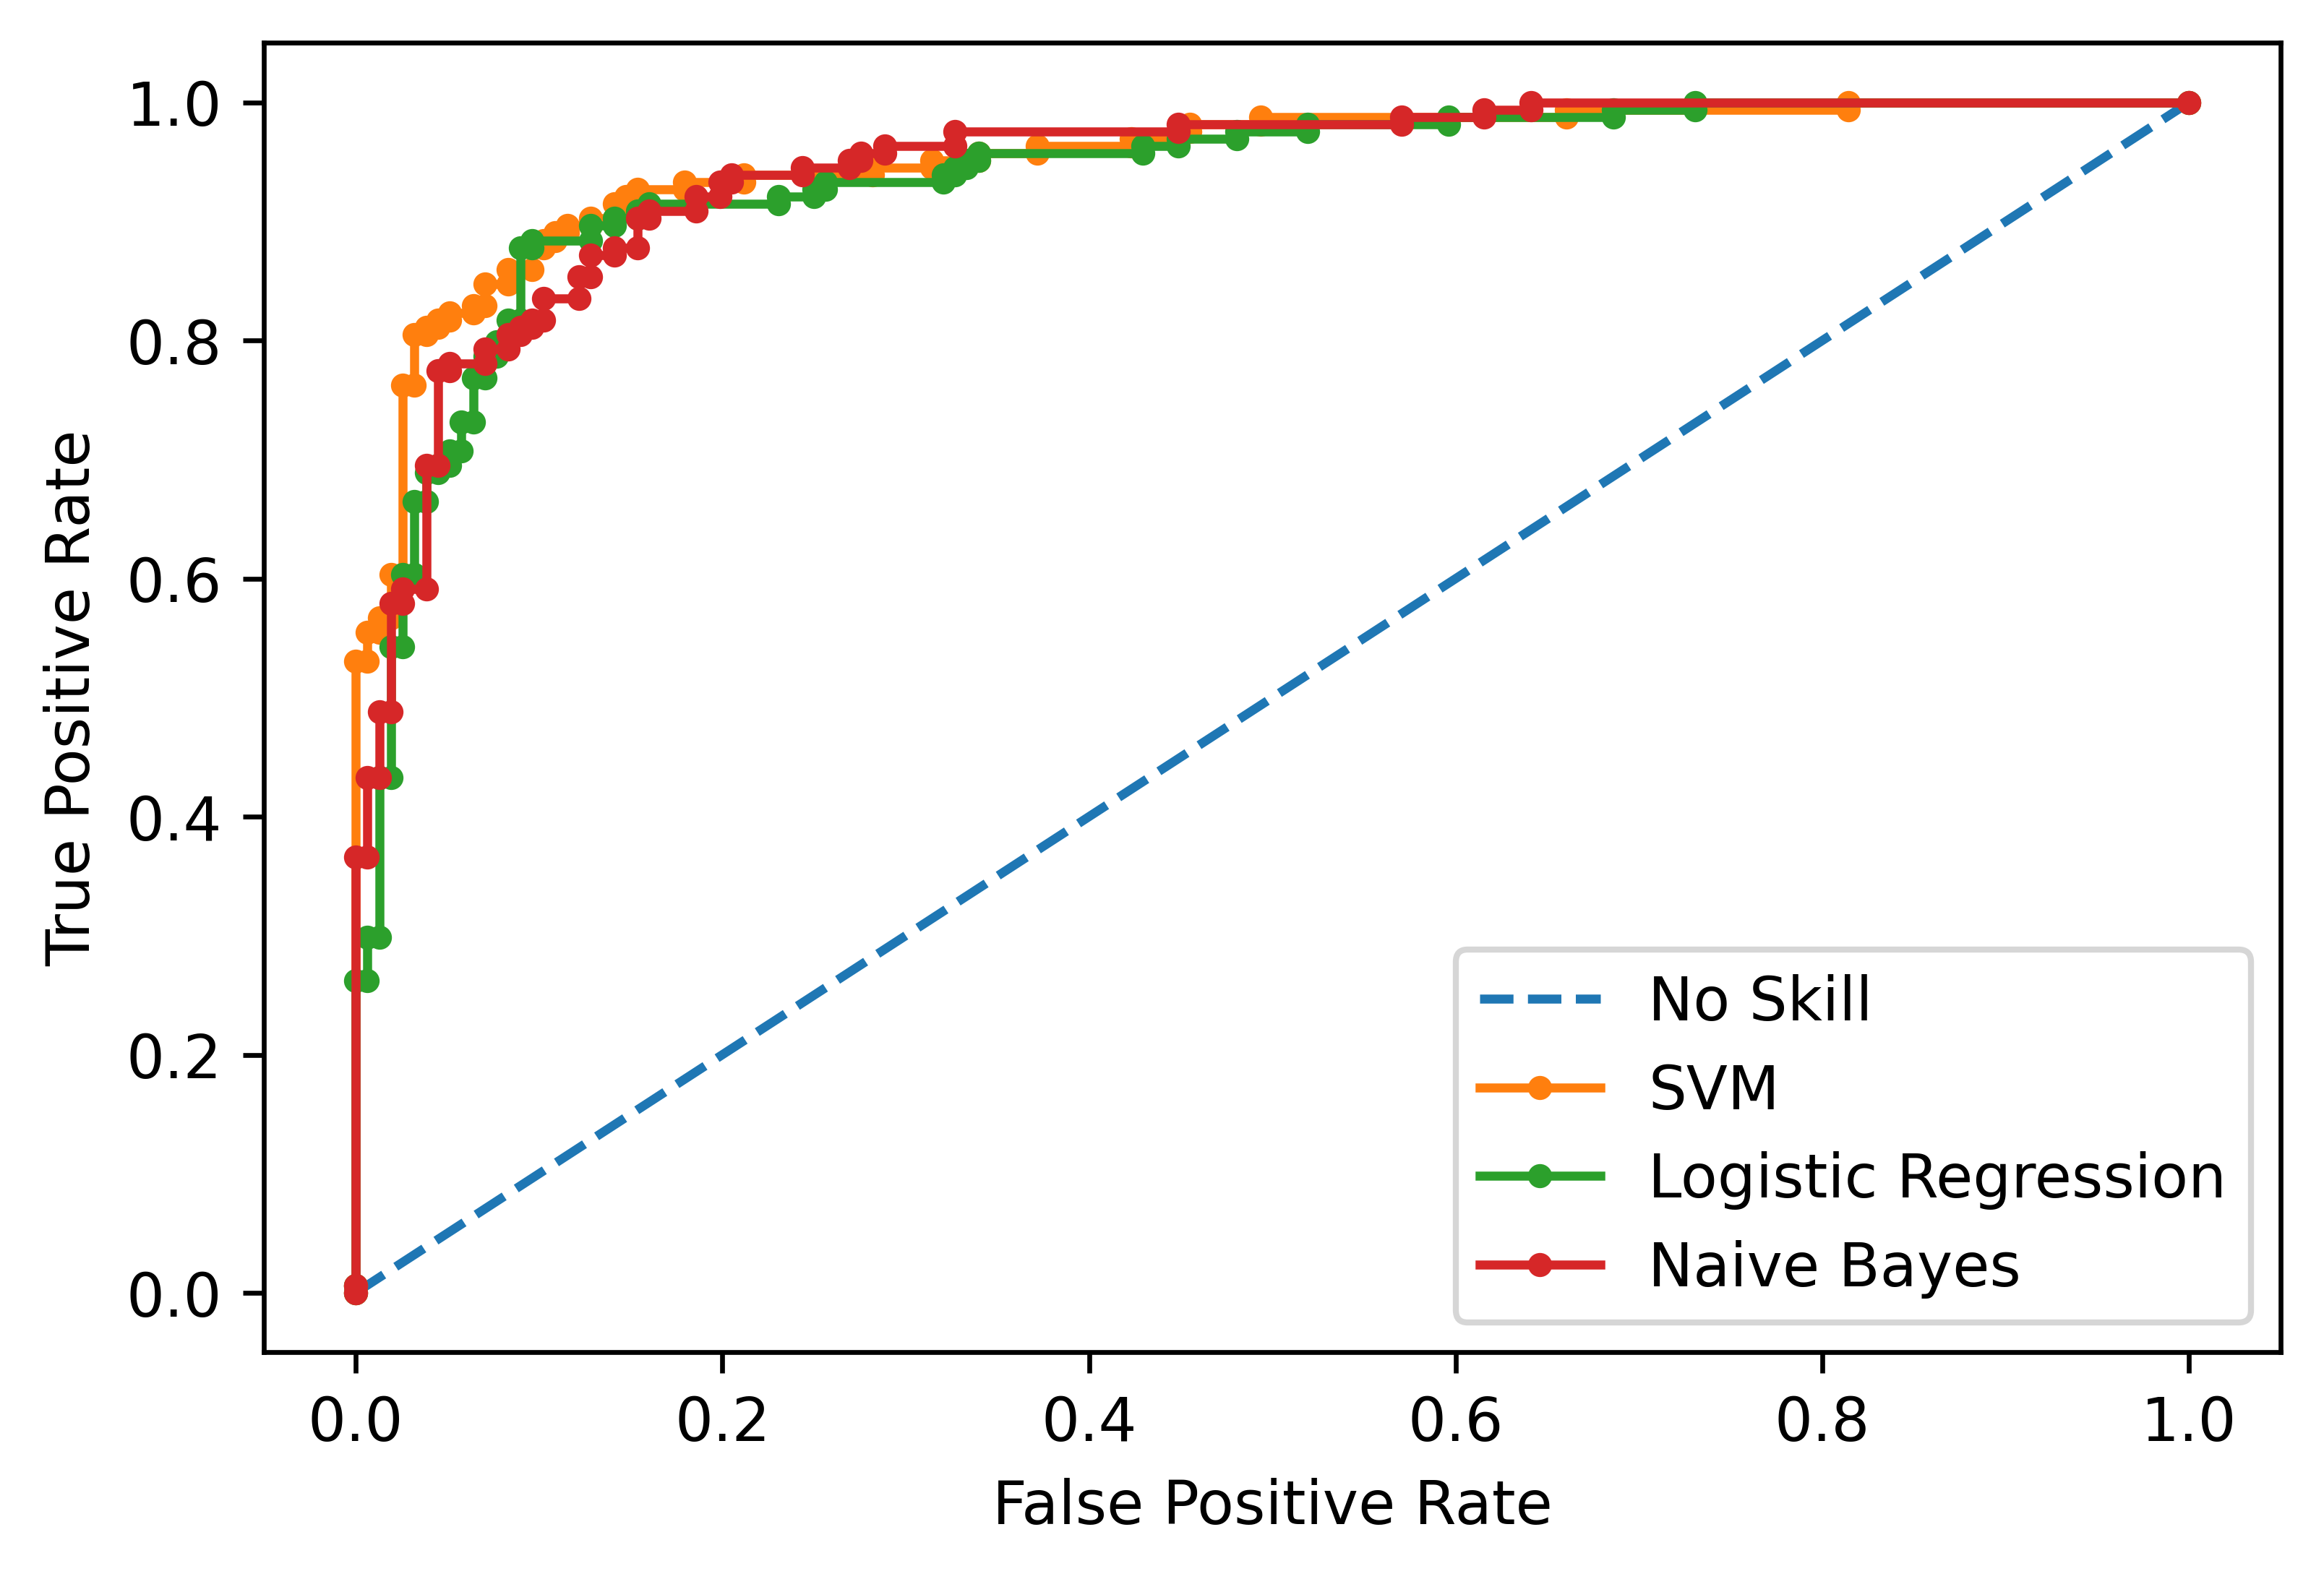

In [22]:
draw_ROC(svm_classifier,X_test,y_test)

Confusion matrix
[[141  15]
 [ 21 143]]
Normalized confusion matrix
[[0.90384615 0.09615385]
 [0.12804878 0.87195122]]


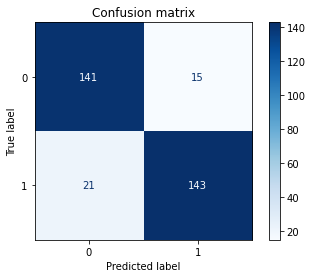

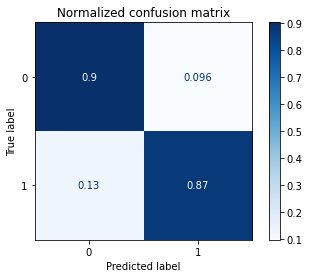

In [23]:
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svm_classifier, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [26]:
from sklearn.naive_bayes import MultinomialNB
model =  MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

Text(0.5, 1.0, 'Naive Bayes classifier')

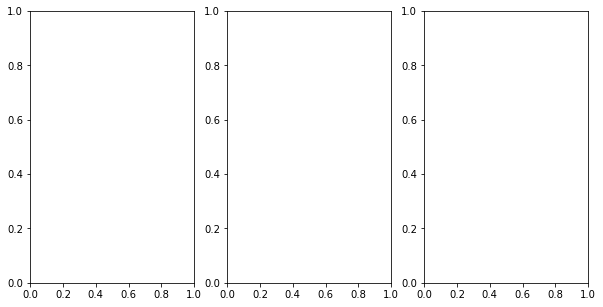

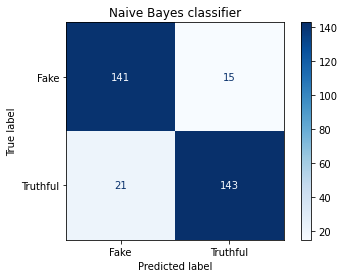

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

disp=plot_confusion_matrix(svm_classifier, X_test, y_test,
                                 display_labels=["Fake","Truthful"],
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Naive Bayes classifier")

